In [1]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider(instance='ibm-q-skku/hackathon-2023/hackathon')

In [2]:
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()

# provider.backends()

# simulator_backend = provider.get_backend('ionq_simulator')

In [3]:
backend = provider.get_backend('ibm_hanoi') # 'ibmq_lima'

# 3-qubit repetition code

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [5]:
nq = 5

creg_data = ClassicalRegister(3)
creg_anc = ClassicalRegister(2)
# creg = ClassicalRegister(nq)
qreg = QuantumRegister(nq)

qc = QuantumCircuit(qreg,creg_data,creg_anc)

qc.cx(0,1)
qc.cx(0,2)

qc.barrier(range(nq))

qc.barrier(range(nq))

qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)

qc.measure([3,4],[creg_anc[0],creg_anc[1]])

# |00> corresponds to classical binary 00
# |10> corresponds to q0 = |0> and q1 = |1> 
# : classical corresonds to 10 in binary, which is 2

# [NOTE] x(0) is required when q_ancilla_0 = 1, q_ancilla_1 = 1 
# => |11> in ancilla space => classical bits 11 in binary = 3
qc.x(0).c_if(creg_anc, 3) 
# [NOTE] x(1) is required when q_ancilla_0 = 1, q_ancilla_1 = 0
# => |01> in ancilla space => classical bits 01 in binary = 1
qc.x(1).c_if(creg_anc, 1)
qc.x(2).c_if(creg_anc, 2)

qc.barrier(range(nq))

qc.measure([0,1,2], [0,1,2])

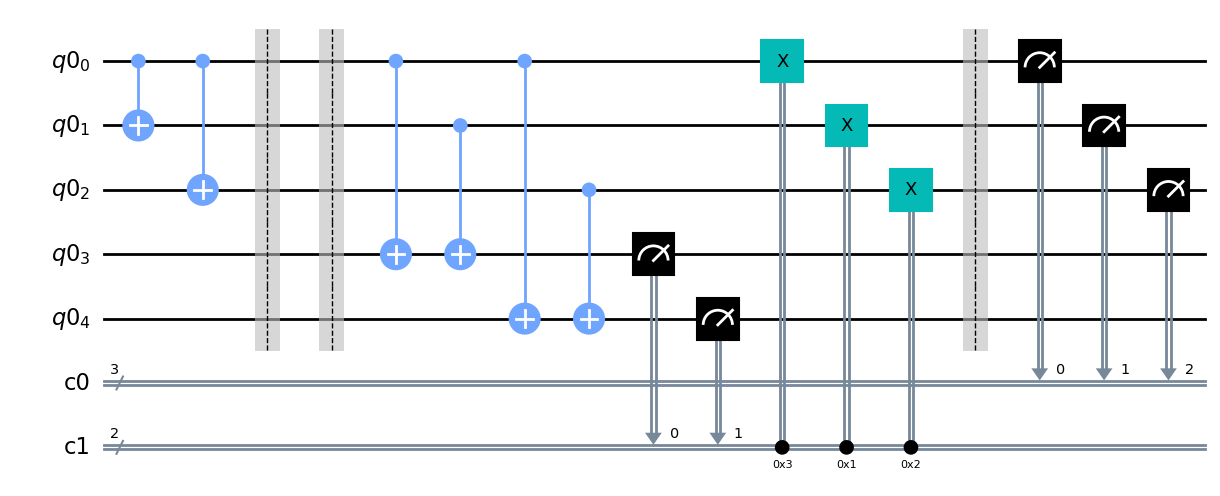

In [6]:
qc.draw('mpl')

In [7]:
from qiskit import transpile

transpiled_circuit = transpile(qc, backend)

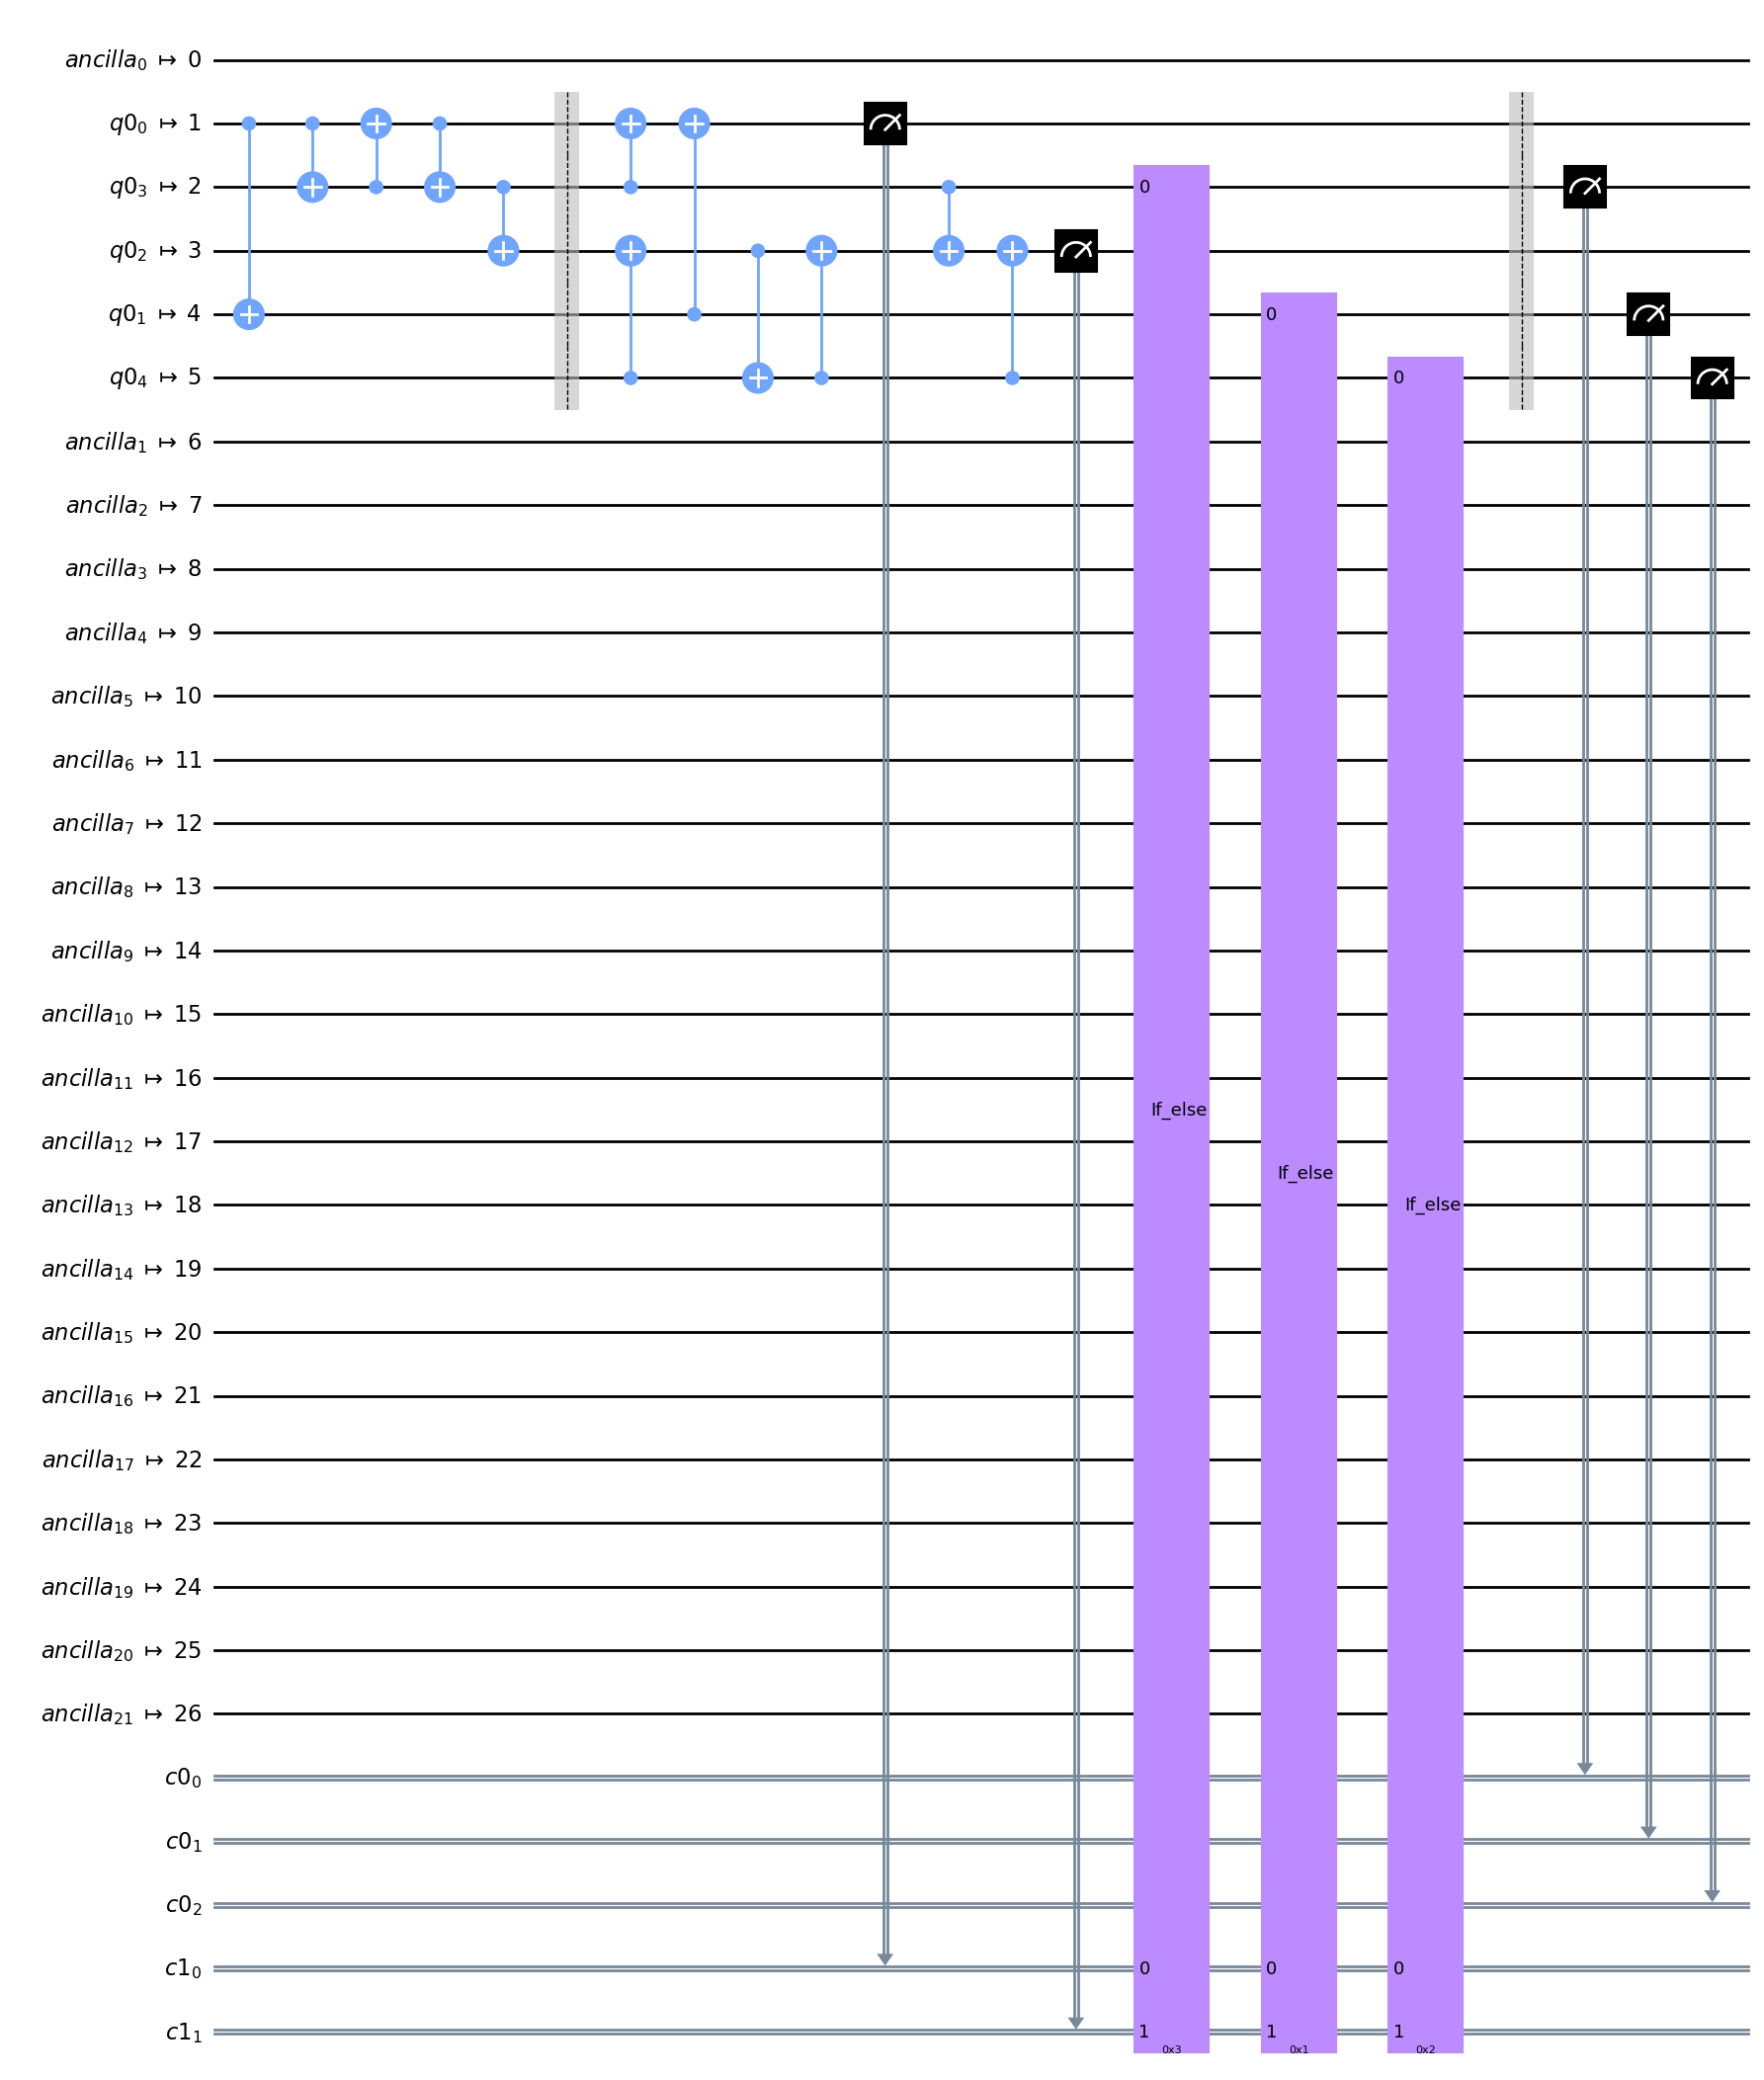

In [8]:
transpiled_circuit.draw('mpl')

In [9]:
job = backend.run(transpiled_circuit)

In [10]:
job.job_id()

'ci9e39hg5luj4ciipmh0'

In [11]:
# counts = job.result().get_counts()